# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
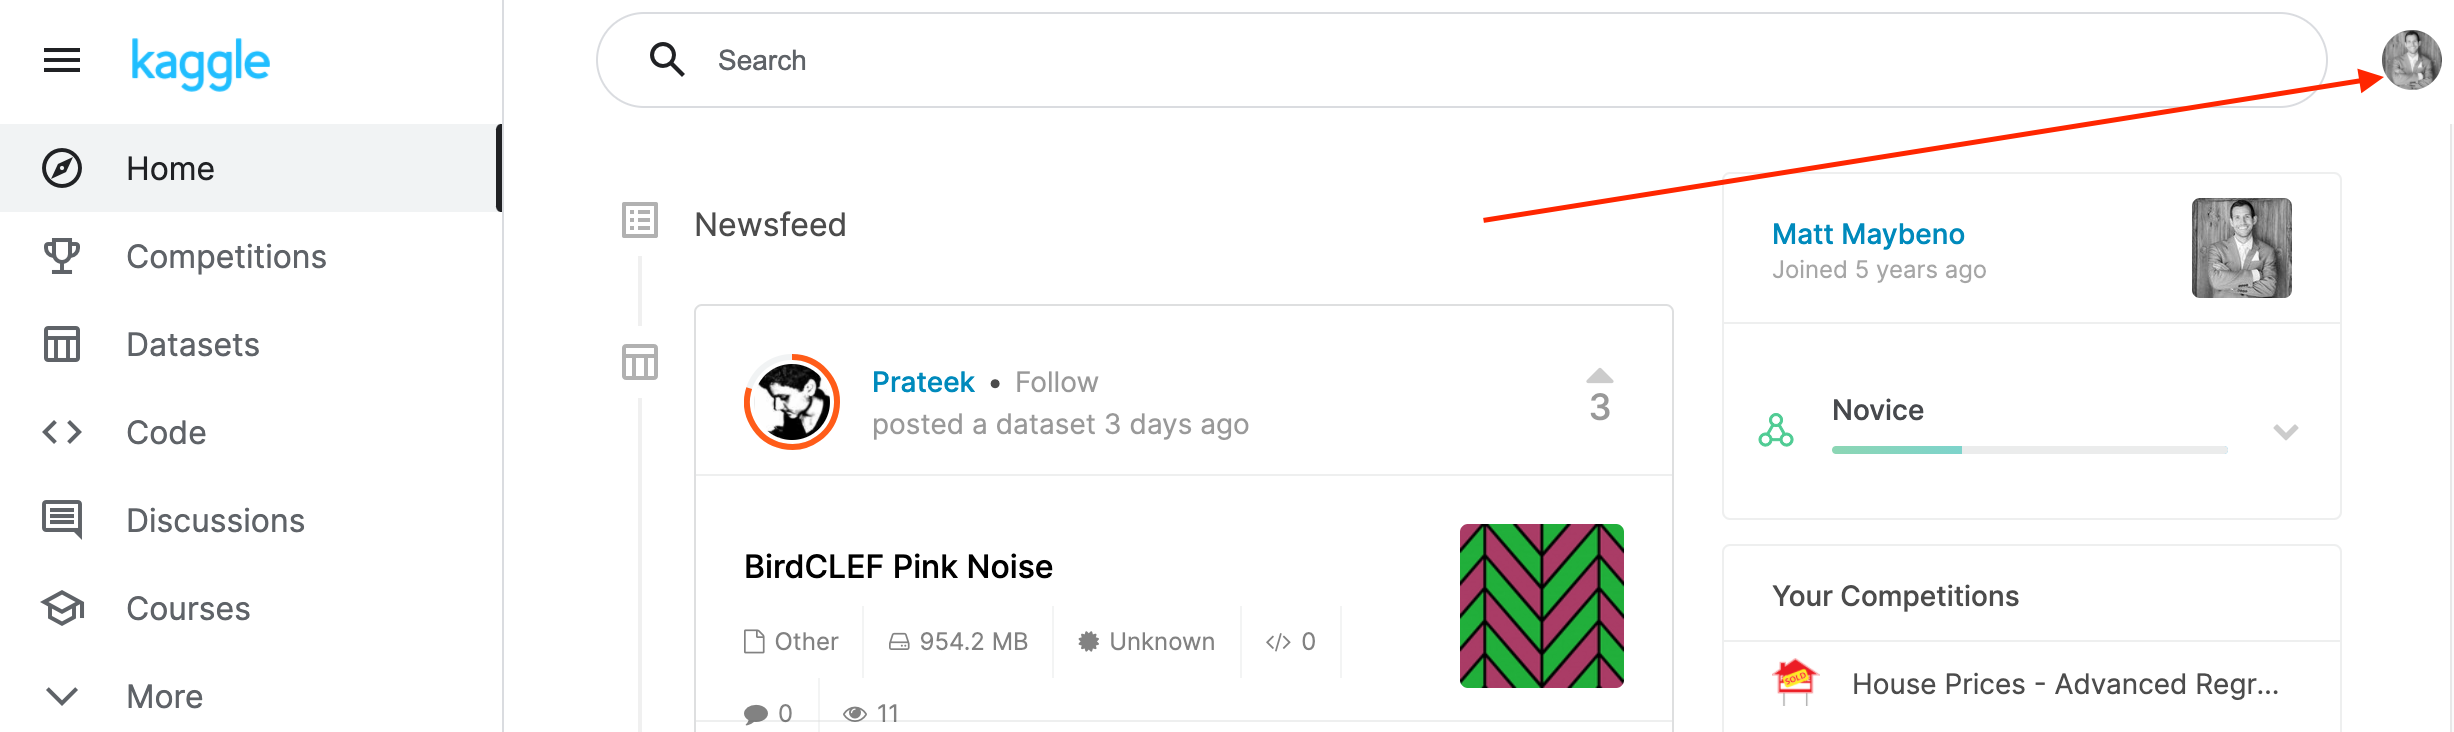
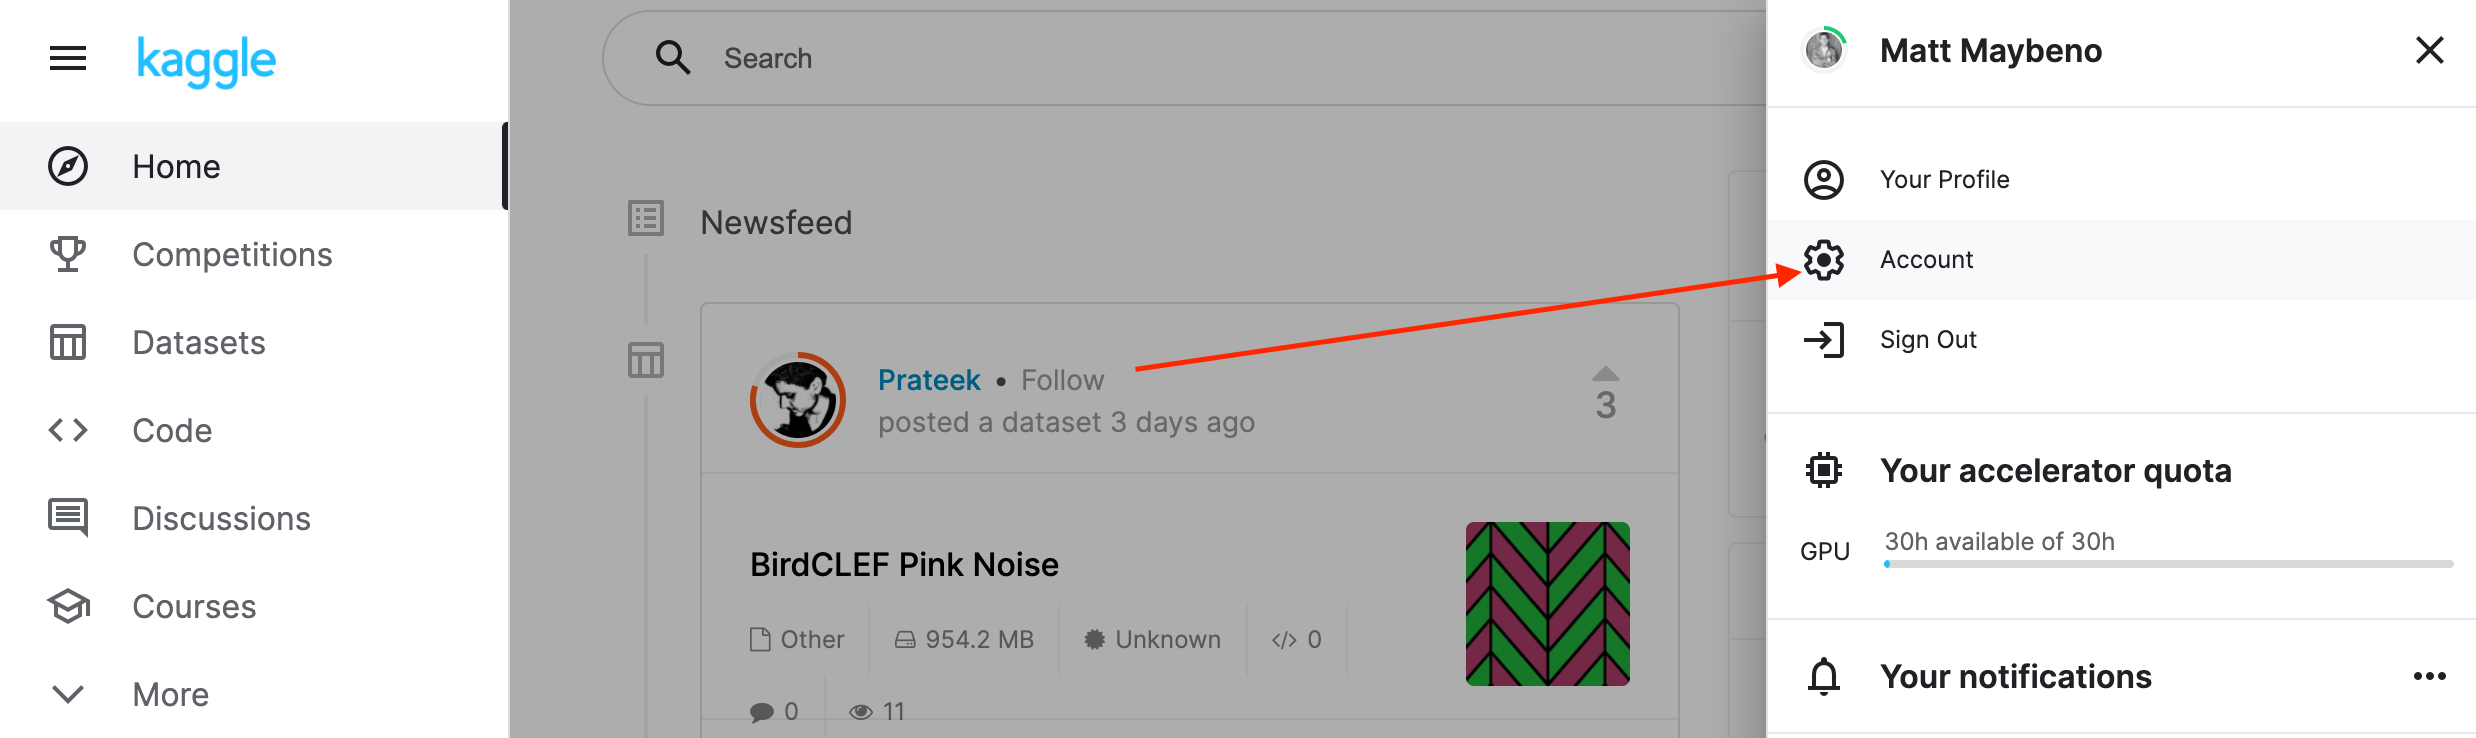
2. Scroll down to API and click Create New API Token.
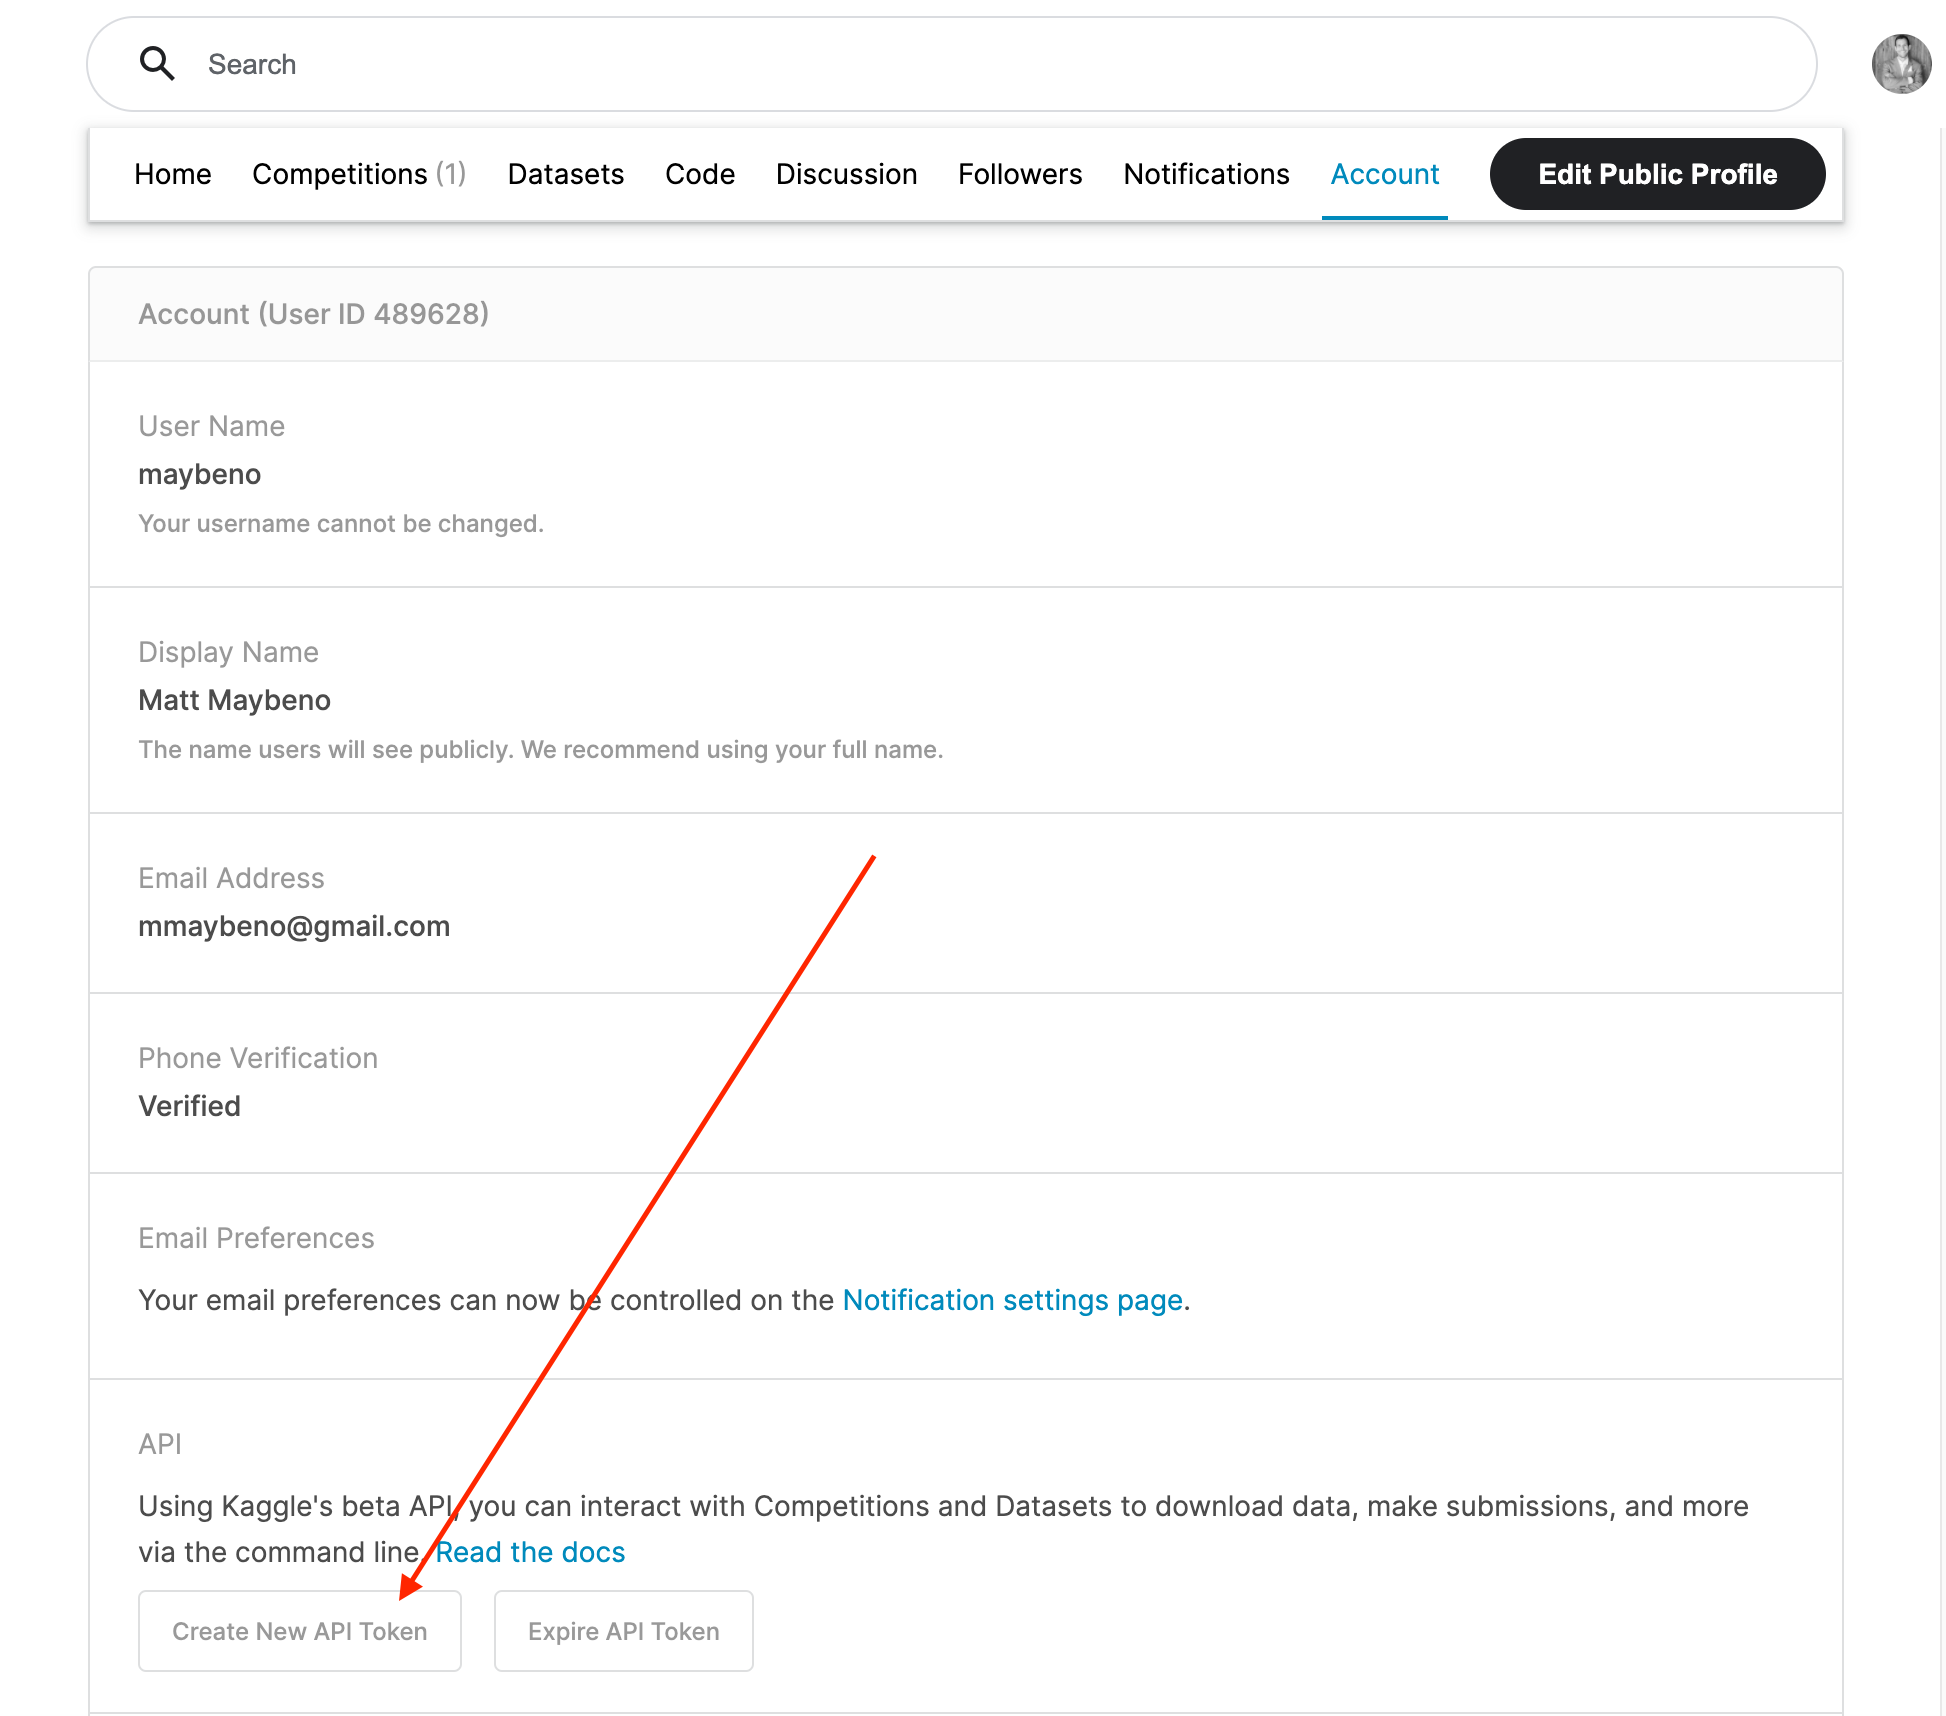
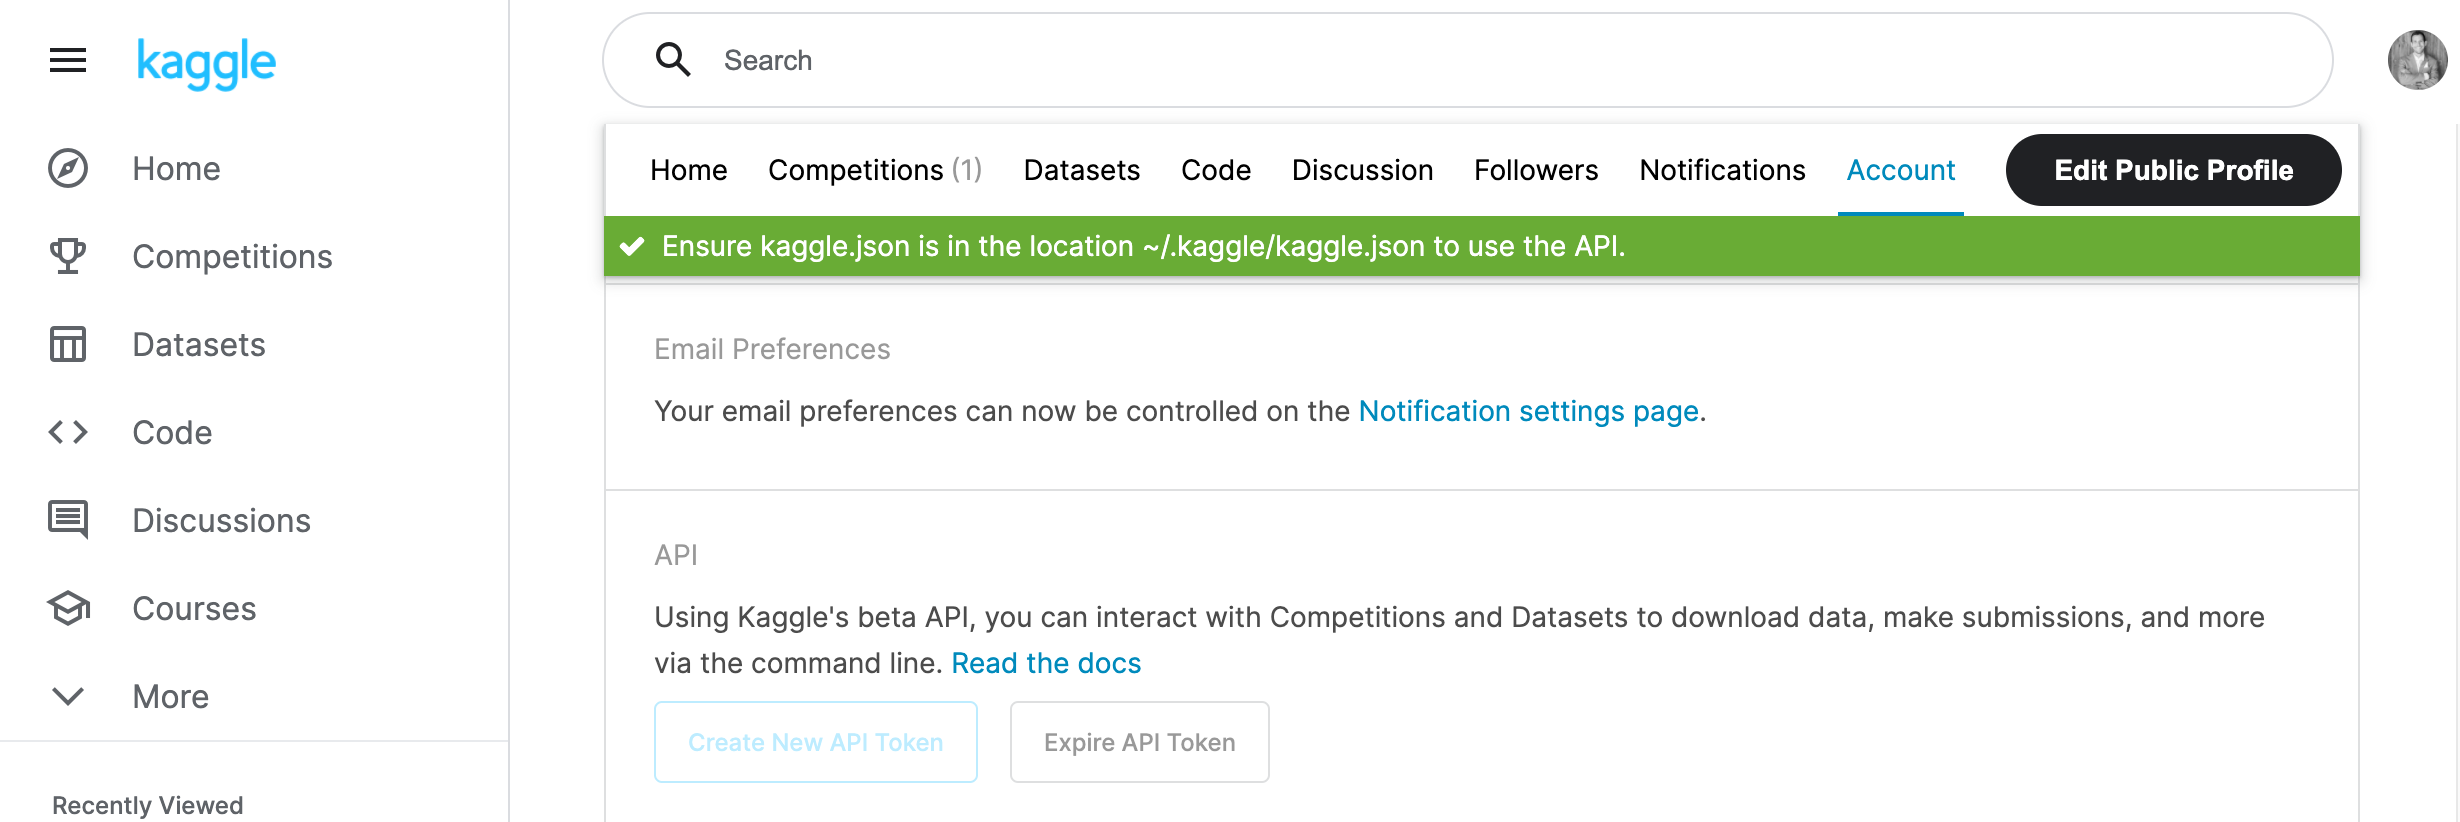
3. Open up `kaggle.json` and use the username and key.
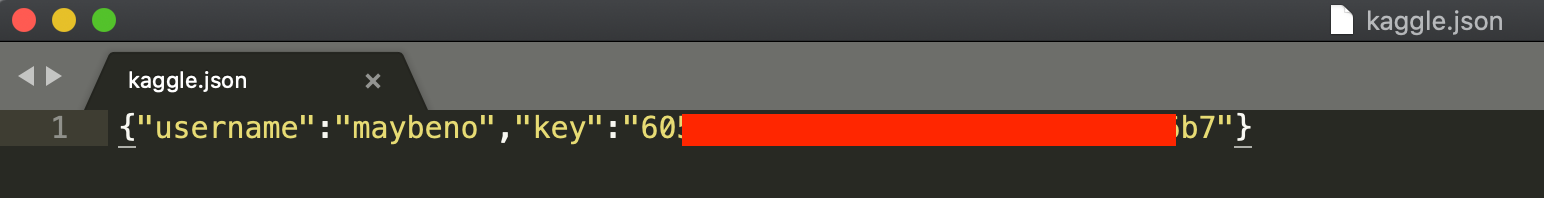

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.15.0 requires dash-core-components==2.0.0, which is not installed.
dash 2.15.0 requires dash-html-components==2.

### Setup Kaggle API Key

In [29]:
pip install kaggle

  Using cached kaggle-1.6.6-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [122]:
!mkdir -p ~/.kaggle
!echo '{"username":"xxxx","key":"hidden"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

#username and keys are removed after this project completion for security reasons


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
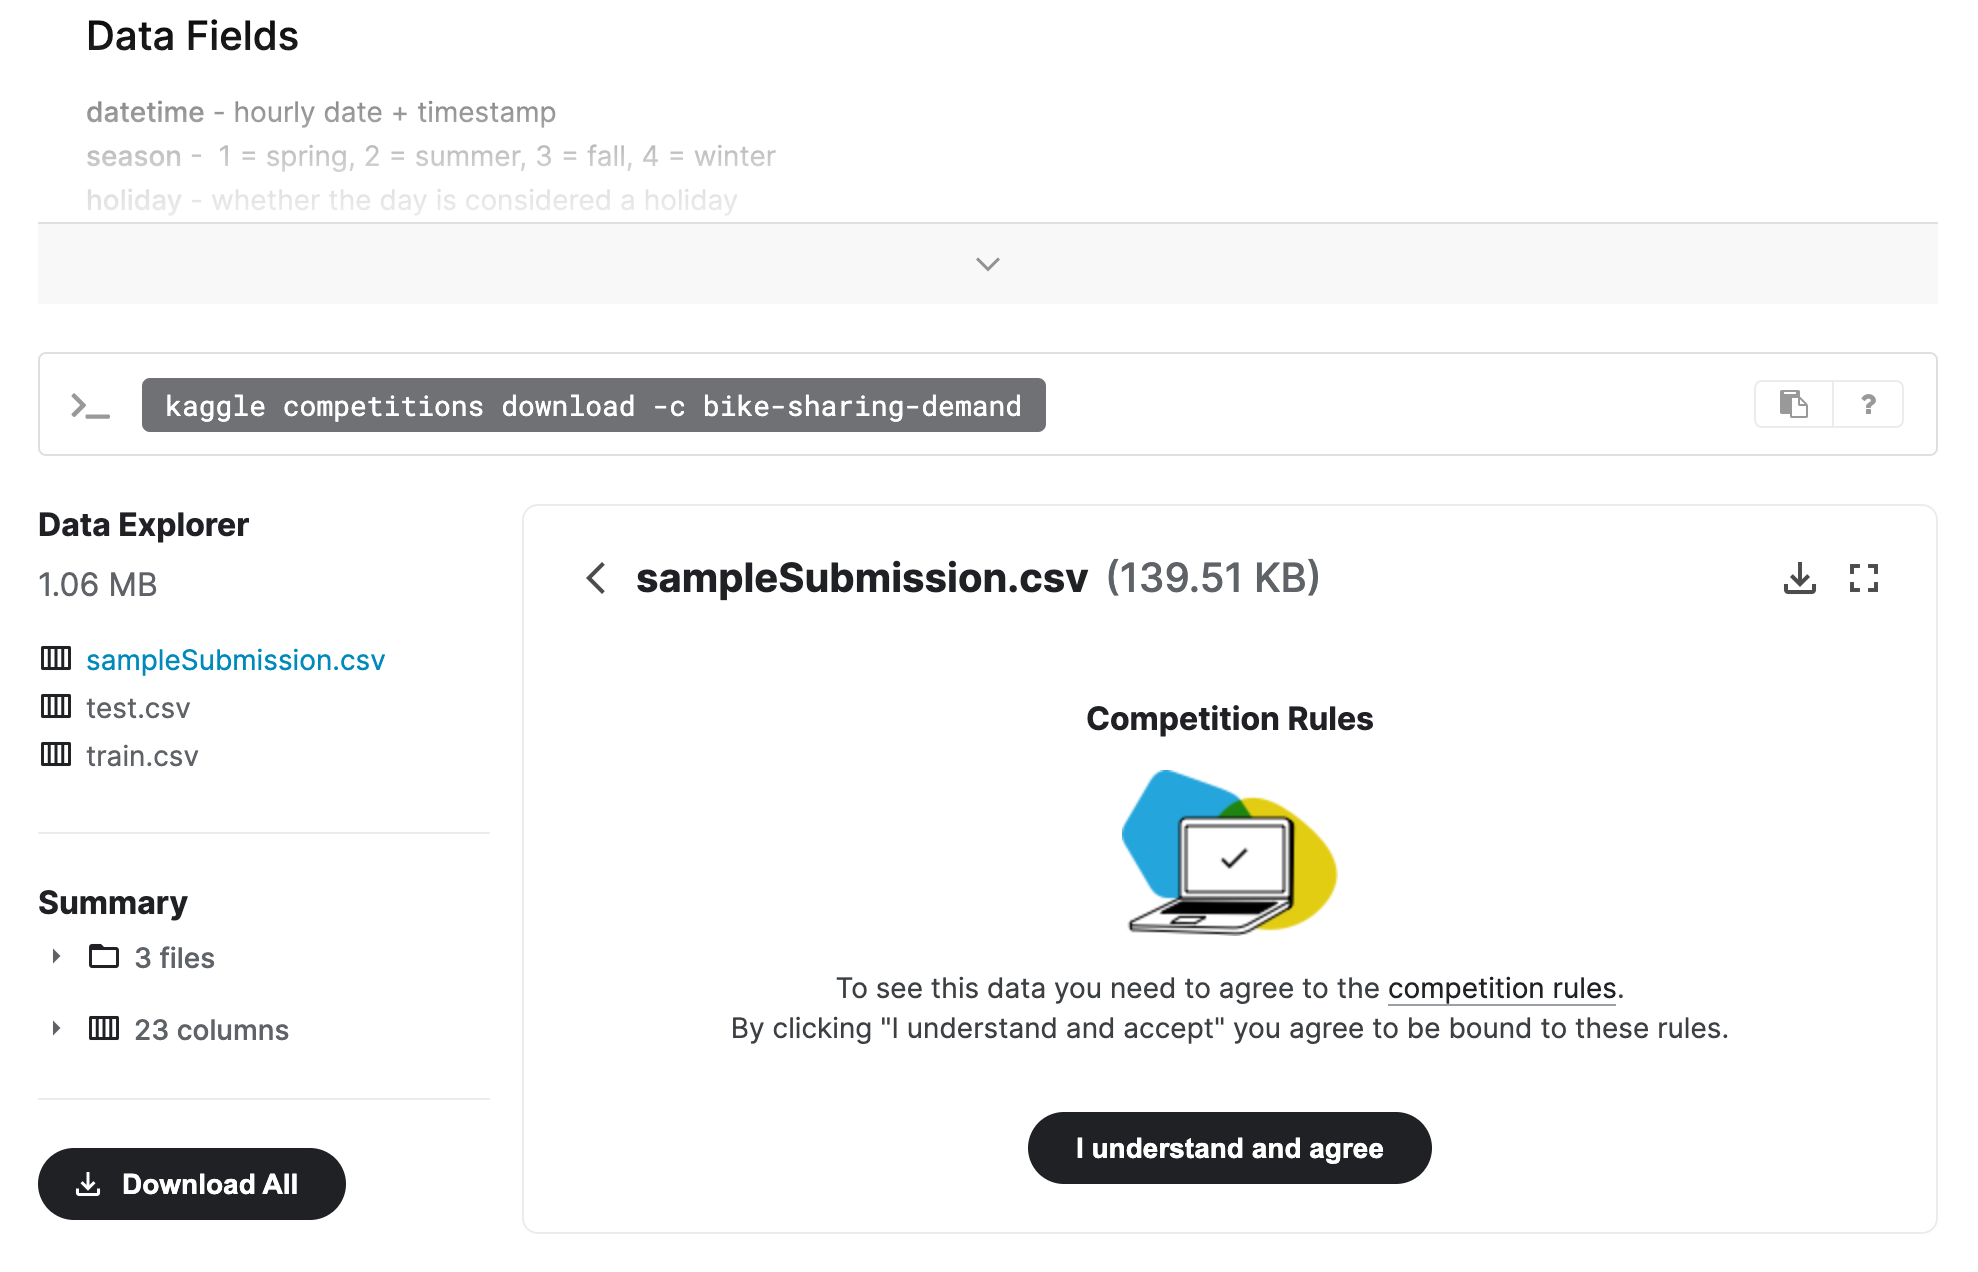

In [22]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.

!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 51.4MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [3]:
import os
os.listdir()

['.sagemaker',
 '.local',
 '.ipython',
 '.npm',
 '.jupyter',
 '.ipynb_checkpoints',
 '.cache',
 '.config',
 'project-template.ipynb',
 '.kaggle',
 'bike-sharing-demand.zip',
 'sampleSubmission.csv',
 'test.csv',
 'train.csv',
 'AutogluonModels',
 'core.686',
 'core.746',
 'core.907',
 'core.960',
 '.virtual_documents']

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


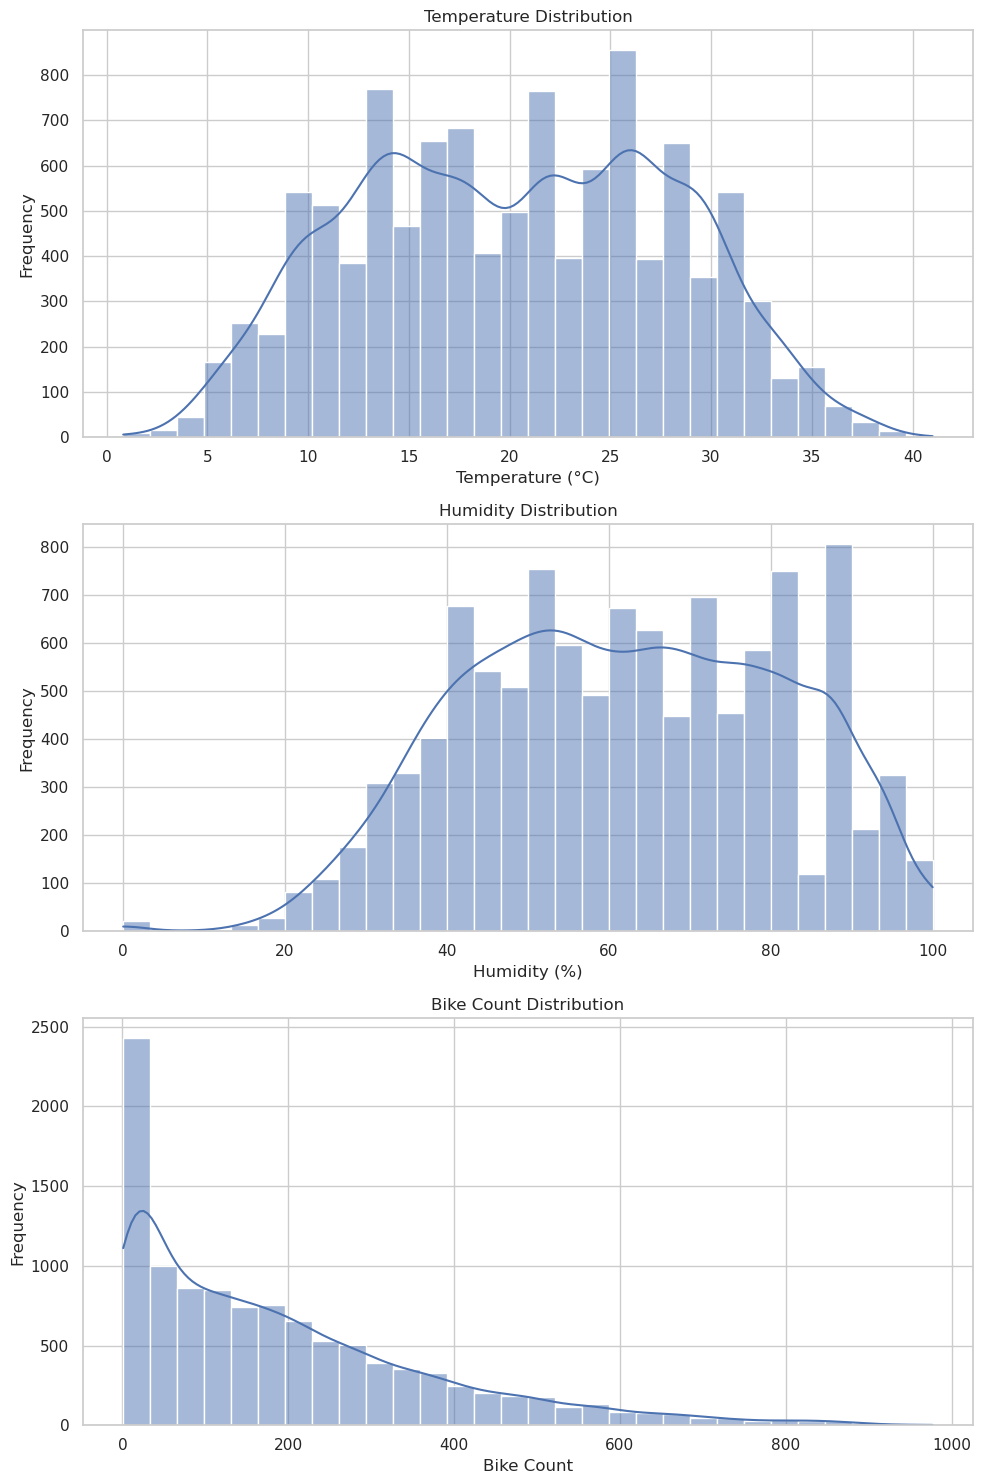

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll create visualizations for a few columns to illustrate the distribution, range, etc.
# Let's visualize the distribution of temperature ('temp'), humidity, and total bike count ('count')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to host the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Temperature Distribution
sns.histplot(train['temp'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Temperature Distribution')
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Frequency')

# Humidity Distribution
sns.histplot(train['humidity'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Humidity Distribution')
ax[1].set_xlabel('Humidity (%)')
ax[1].set_ylabel('Frequency')

# Bike Count Distribution
sns.histplot(train['count'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Bike Count Distribution')
ax[2].set_xlabel('Bike Count')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Note: For a more detailed analysis, you can create similar plots for other variables,
# or explore relationships between variables using scatter plots, box plots, etc.


In [36]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv" , parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [37]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
from autogluon.tabular import TabularPredictor


df_train = train.drop(['casual', 'registered'], axis=1)  # Drop unnecessary columns

# Initialize and train the predictor
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=df_train,
    presets='best_quality',
    time_limit=600  # 10 minutes
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240315_054403"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240315_054403"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Feb 13 09:50:28 UTC 2024
Disk Space Avail:   3.55 GB / 5.36 GB (66.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 9
Label Column: co

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	37.87s	 = Training   runtime
	4.69s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 349.04s of the 549.09s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	10.1s	 = Training   runtime
	0.97s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 336.34s of the 536.4s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	12.64s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 322.74s of the 522.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6688.
	Ran out of time, early stopping on iteration 6528.
	Ran out of time, early stopping on iteration 7015.
	-130.4723	 = Validation score   (-root_mean_squared_error)
	213.56s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 109.01s of the 309.07s of remaining time.
	-124.6007	 = Validation score   (-root_mean_squared_error)
	5.84s	 = Training   r

[1000]	valid_set's rmse: 60.5056
[2000]	valid_set's rmse: 59.57
[3000]	valid_set's rmse: 59.4812
[1000]	valid_set's rmse: 60.4268
[2000]	valid_set's rmse: 59.2016
[3000]	valid_set's rmse: 59.2915
[1000]	valid_set's rmse: 64.493
[2000]	valid_set's rmse: 63.0744
[1000]	valid_set's rmse: 64.8833
[2000]	valid_set's rmse: 62.8015
[3000]	valid_set's rmse: 62.7467
[1000]	valid_set's rmse: 58.8567
[2000]	valid_set's rmse: 57.6621
[1000]	valid_set's rmse: 62.8606
[2000]	valid_set's rmse: 61.7437
[1000]	valid_set's rmse: 63.0114
[2000]	valid_set's rmse: 61.8943
[3000]	valid_set's rmse: 61.8432
[1000]	valid_set's rmse: 57.5588
[2000]	valid_set's rmse: 56.9138


	-60.2919	 = Validation score   (-root_mean_squared_error)
	35.69s	 = Training   runtime
	2.66s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 158.63s of the 158.62s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.0709	 = Validation score   (-root_mean_squared_error)
	9.01s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 149.2s of the 149.19s of remaining time.
	-53.3812	 = Validation score   (-root_mean_squared_error)
	40.95s	 = Training   runtime
	0.58s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 107.25s of the 107.23s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.7032	 = Validation score   (-root_mean_squared_error)
	71.86s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... T

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.352726       8.827713  463.697326                0.000505           0.240256            3       True         18
1   RandomForestMSE_BAG_L2  -53.381197       7.922961  421.385162                0.578288          40.950685            2       True         14
2     ExtraTreesMSE_BAG_L2  -54.071885       7.916555  391.174463                0.571882          10.739986            2       True         16
3          LightGBM_BAG_L2  -55.070880       7.517472  389.443053                0.172798           9.008576            2       True         13
4   NeuralNetFastAI_BAG_L2  -55.316950       7.504241  402.757823                0.159567          22.323346            2       True         17
5          CatBoost_BAG_L2  -55.703150       7.385214  452.296477         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsemb

### Create predictions from test dataset

In [38]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [84]:
best_model = predictor.get_model_best()


leaderboard = predictor.leaderboard(silent=True)  # silent=True to avoid printing the table


top_model_initial = leaderboard.loc[leaderboard['model'] == best_model, 'score_val'].values[0]

print(f"Score of the top model ({best_model}):", top_model_initial)

Score of the top model (WeightedEnsemble_L3): -52.35272594011032


In [85]:
## **RMSE is postive value of score_val, this might be the negated version of one of those metrics to ensure a "higher is better" interpretation universally across AutoGluon's interface. **

RMSE_predictor_initial = abs(top_model_initial)
RMSE_predictor_initial

52.35272594011032

In [19]:
# Generate predictions for the test dataset
predictions = predictor.predict(test)

# Display the first few predictions
print(predictions.head())

0    24.955175
1    40.923431
2    45.107960
3    47.340199
4    49.992210
Name: count, dtype: float32


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values?

predictions.describe()

count    6493.000000
mean      101.887978
std        88.565239
min        -0.446191
25%        23.812057
50%        70.210159
75%       170.706375
max       358.332458
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
negative_values_count = (predictions < 0).sum()
negative_values_count

2

In [24]:
# Set them to zero
predictions[predictions < 0] = 0

In [25]:
predictions.describe()

count    6493.000000
mean      101.888100
std        88.565086
min         0.000000
25%        23.812057
50%        70.210159
75%       170.706375
max       358.332458
Name: count, dtype: float64

In [26]:
negative_values_count = (predictions < 0).sum()
negative_values_count

0

### Set predictions to submission dataframe, save, and submit

In [27]:



# Set the predictions to the 'count' column of the submission DataFrame
submission["count"] = predictions

# Save the DataFrame to a CSV file, without the index
submission.to_csv("submission.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission RamkumarM"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 428kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description                     status    publicScore  privateScore  
--------------  -------------------  ------------------------------  --------  -----------  ------------  
submission.csv  2024-03-15 06:05:03  first raw submission RamkumarM  complete  1.7781       1.7781        


#### Initial score of `?`

In [74]:
initial_score = 1.7781

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

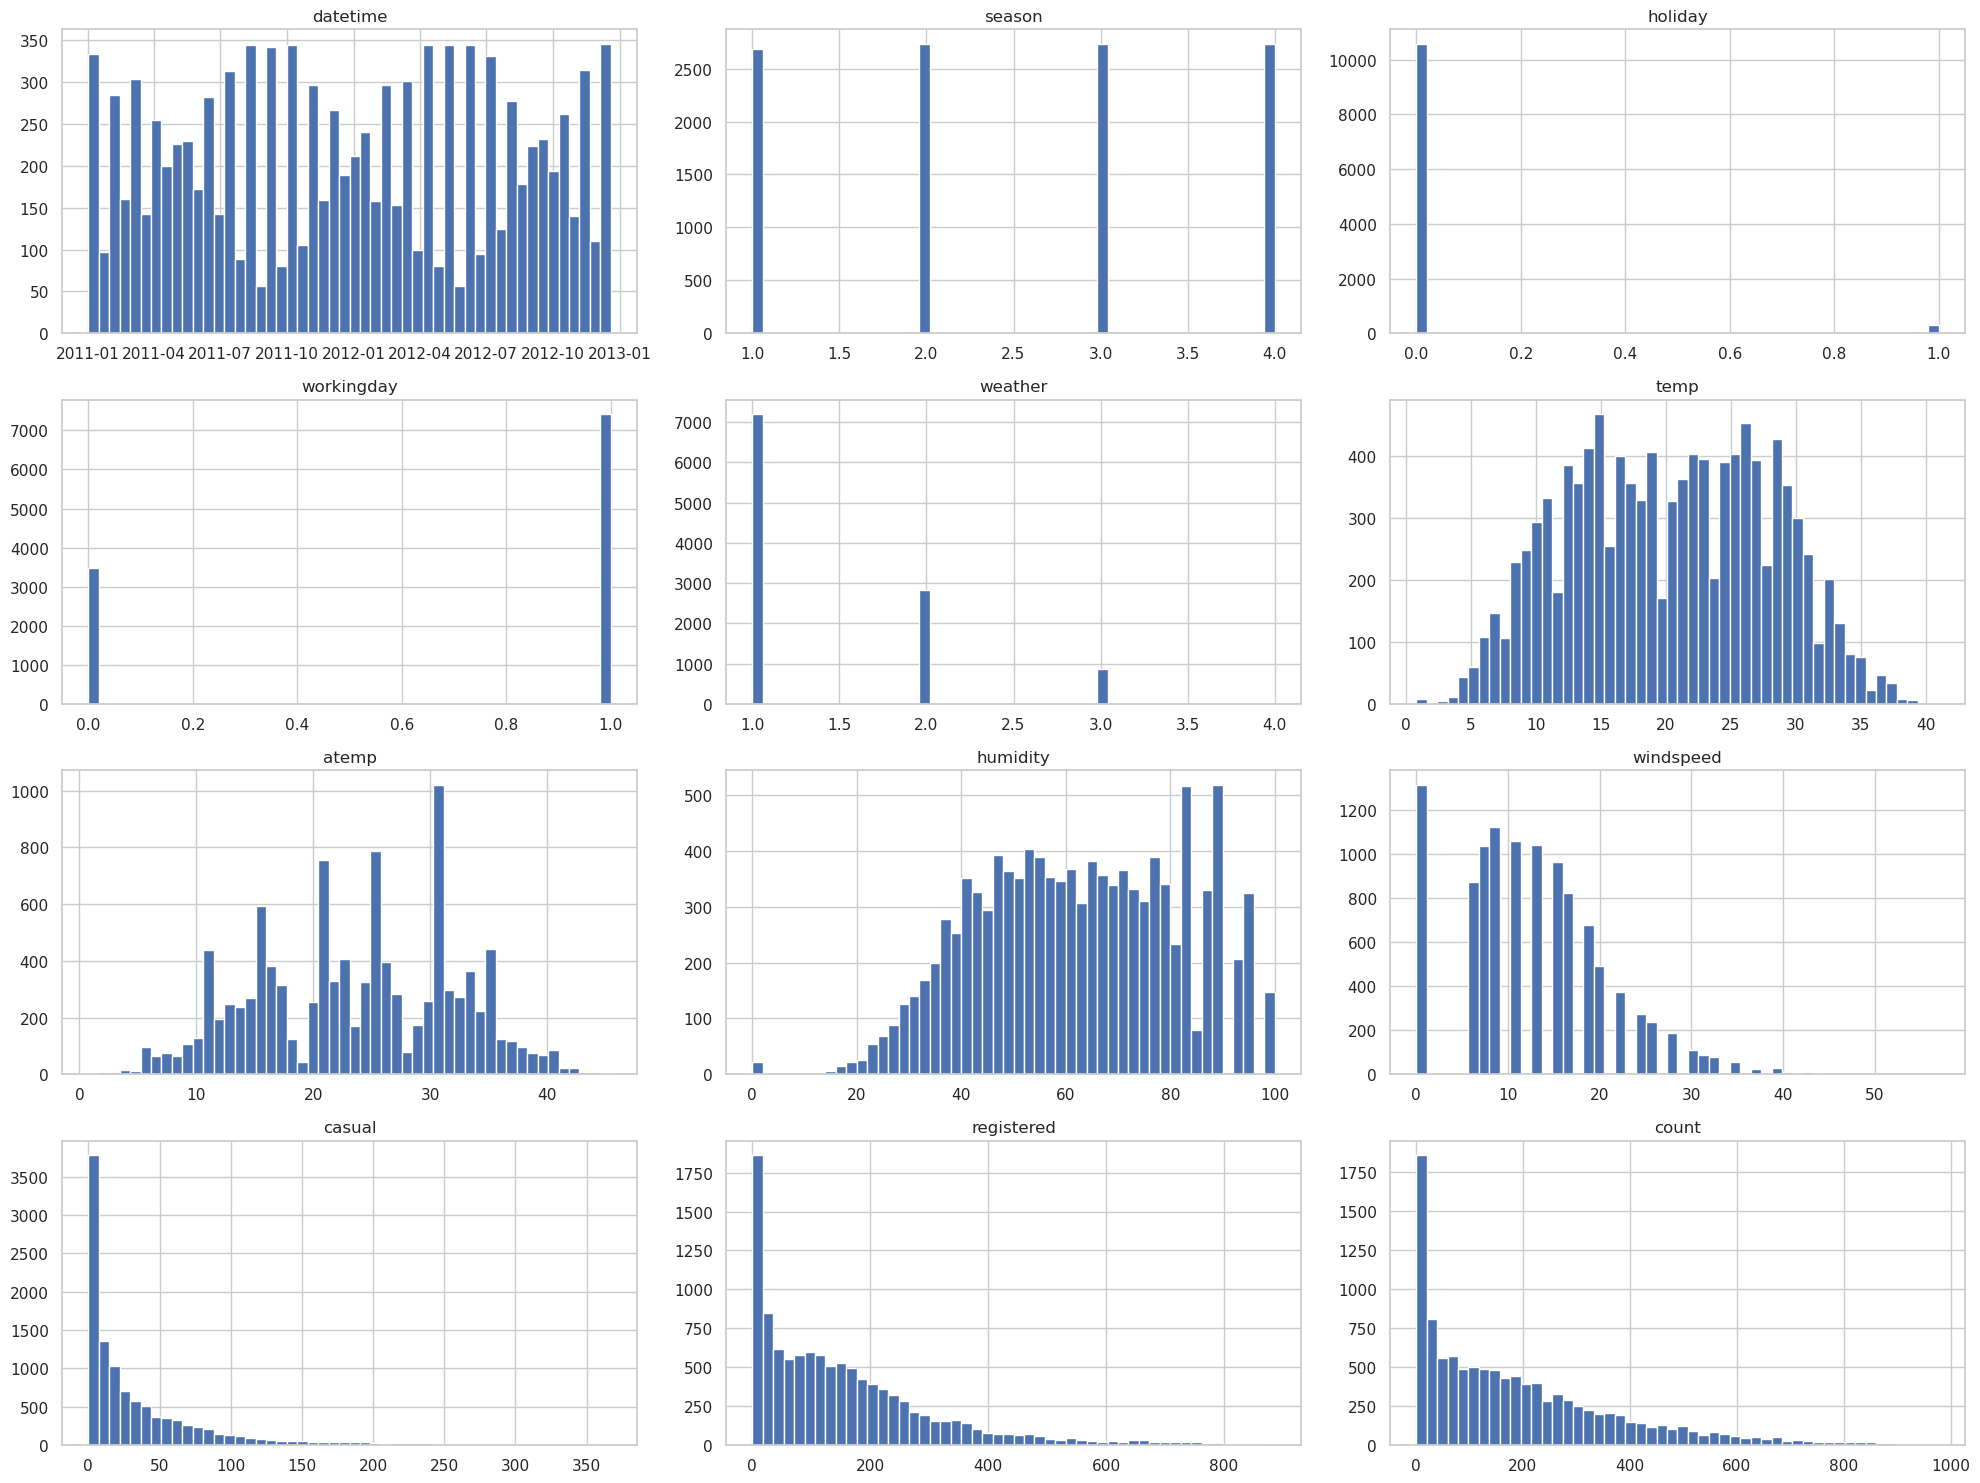

In [32]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
## train.?


train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [33]:
# create a new feature
#train[?] = ?
#test[?] = ?


train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

# Drop the 'datetime' column for the histogram as it's no longer needed
train.drop(['datetime'], axis=1, inplace=True)

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [40]:
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

# Drop the 'datetime' column for the histogram as it's no longer needed
test.drop(['datetime'], axis=1, inplace=True)

test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [41]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [42]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


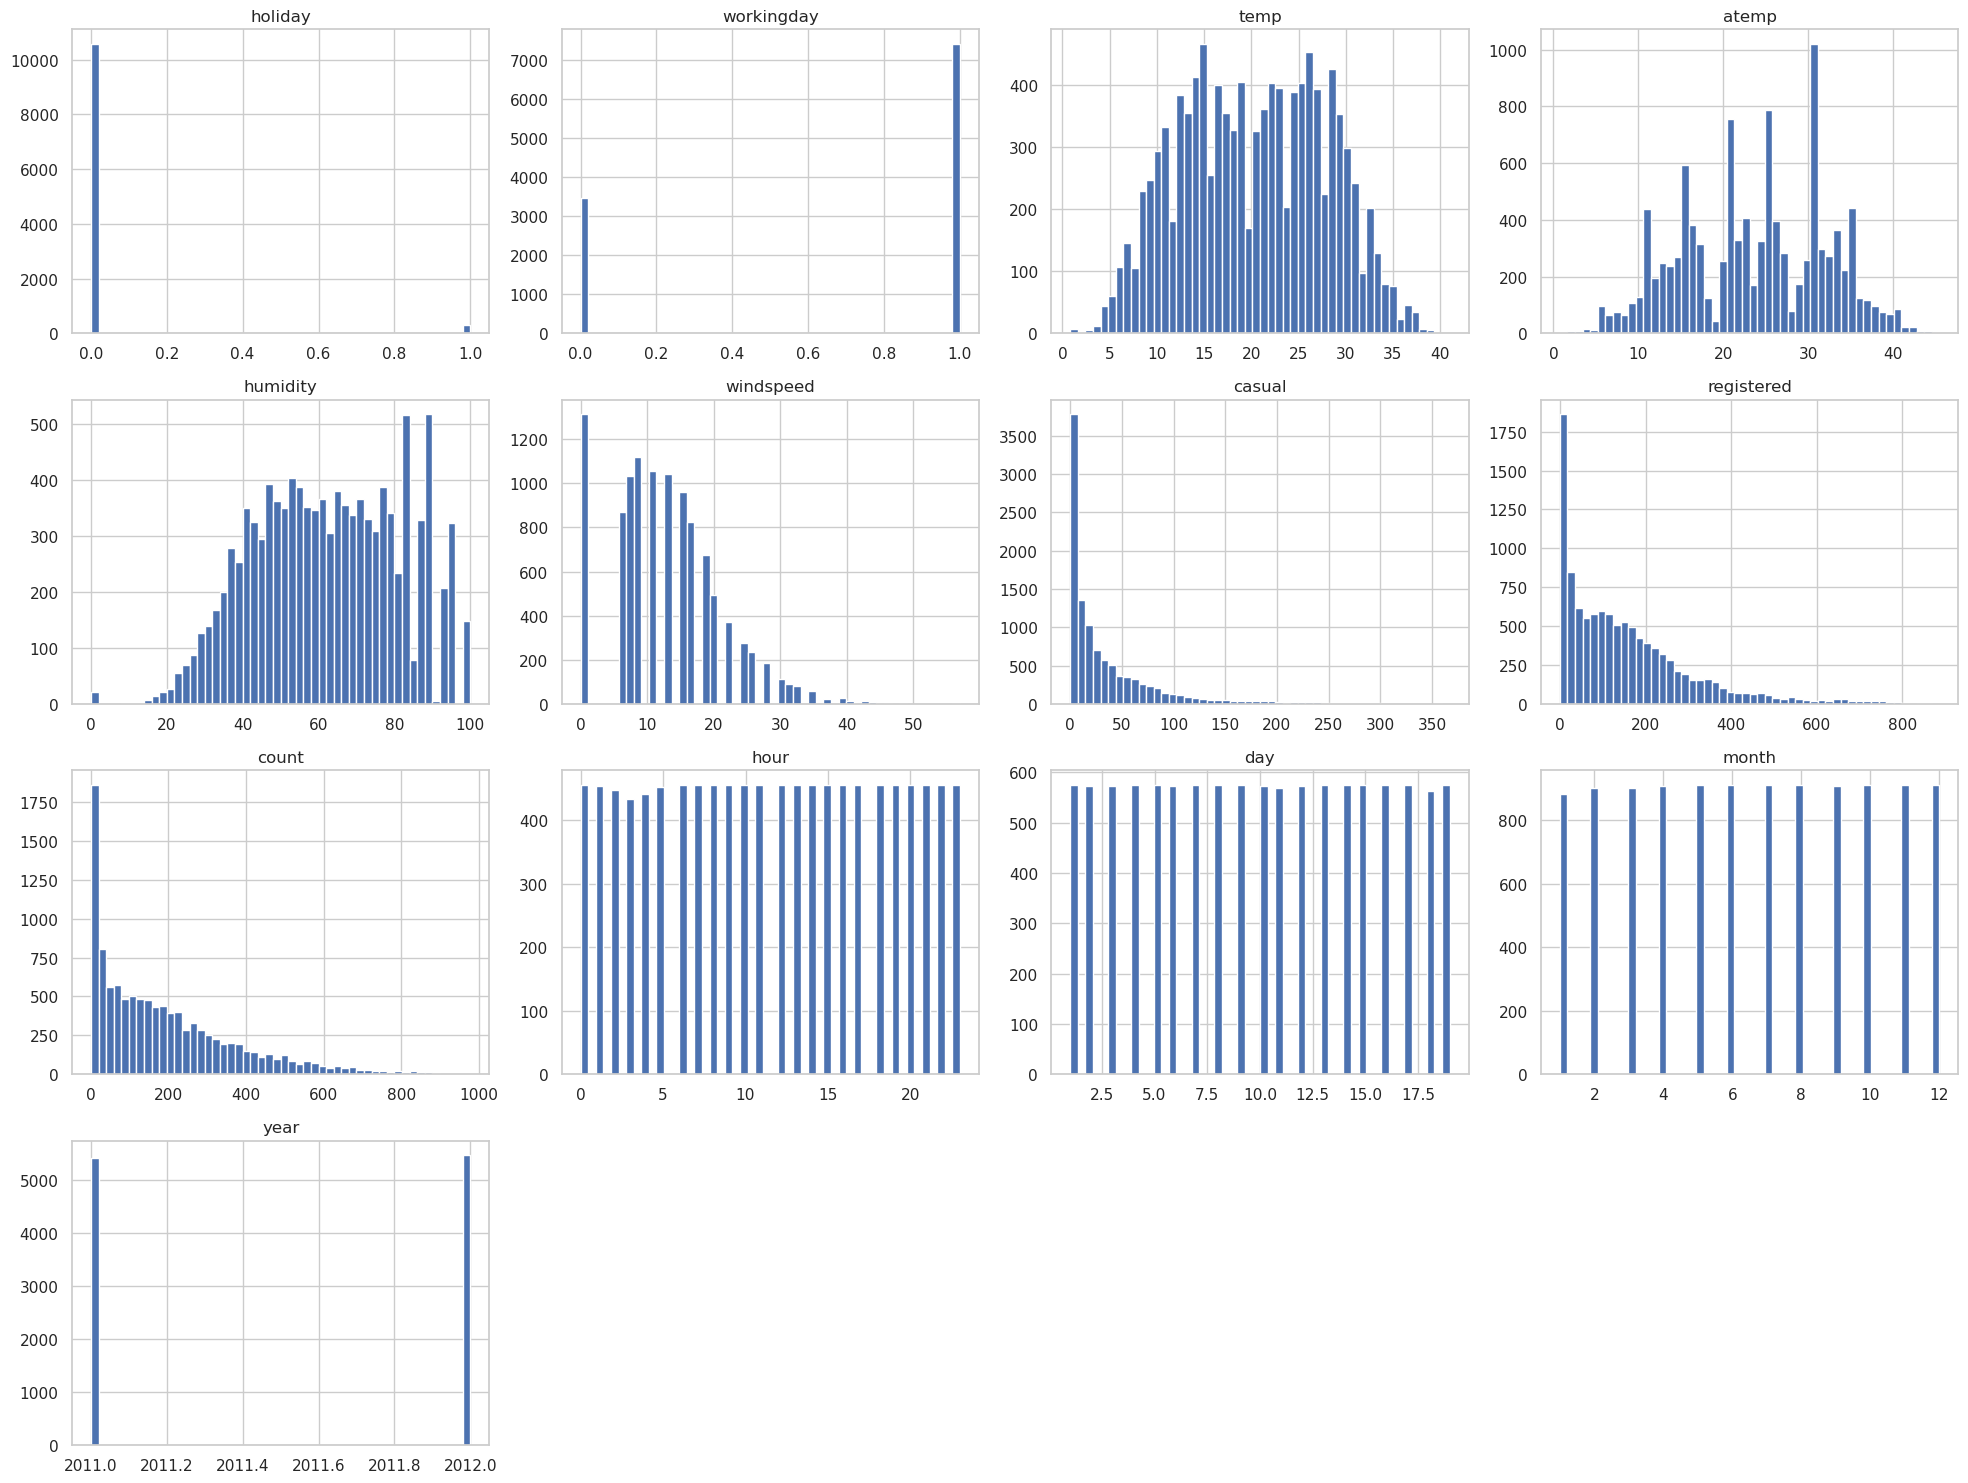

In [43]:
# View histogram of all features again now with the hour feature
train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:




df_train = train.drop(['casual', 'registered'], axis=1)  # Drop unnecessary columns

# Initialize and train the predictor
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=df_train,
    presets='best_quality',
    time_limit=600  # 10 minutes
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240315_063823"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240315_063823"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Feb 13 09:50:28 UTC 2024
Disk Space Avail:   2.15 GB / 5.36 GB (40.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 12
Label Column: c

[1000]	valid_set's rmse: 38.4238
[2000]	valid_set's rmse: 36.8167
[3000]	valid_set's rmse: 36.4274
[4000]	valid_set's rmse: 36.3218
[5000]	valid_set's rmse: 36.3084
[1000]	valid_set's rmse: 39.6908
[2000]	valid_set's rmse: 38.0505
[3000]	valid_set's rmse: 37.6301
[4000]	valid_set's rmse: 37.3472
[5000]	valid_set's rmse: 37.1632
[6000]	valid_set's rmse: 37.0375
[7000]	valid_set's rmse: 36.9797
[8000]	valid_set's rmse: 36.9741
[9000]	valid_set's rmse: 37.0268
[10000]	valid_set's rmse: 36.9971
[1000]	valid_set's rmse: 39.4295
[2000]	valid_set's rmse: 37.5109
[3000]	valid_set's rmse: 37.0863
[4000]	valid_set's rmse: 36.8353
[5000]	valid_set's rmse: 36.6932
[6000]	valid_set's rmse: 36.6116
[7000]	valid_set's rmse: 36.5933
[8000]	valid_set's rmse: 36.574
[9000]	valid_set's rmse: 36.5305
[10000]	valid_set's rmse: 36.5171
[1000]	valid_set's rmse: 40.5786
[2000]	valid_set's rmse: 38.818
[3000]	valid_set's rmse: 38.4913
[4000]	valid_set's rmse: 38.3828
[5000]	valid_set's rmse: 38.3671
[6000]	val

	-37.3596	 = Validation score   (-root_mean_squared_error)
	55.65s	 = Training   runtime
	9.52s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 324.22s of the 524.28s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 36.6982
[2000]	valid_set's rmse: 36.2915
[3000]	valid_set's rmse: 36.2664
[1000]	valid_set's rmse: 37.4772
[2000]	valid_set's rmse: 36.6554
[3000]	valid_set's rmse: 36.3048
[4000]	valid_set's rmse: 36.368
[1000]	valid_set's rmse: 37.1871
[2000]	valid_set's rmse: 36.5679
[3000]	valid_set's rmse: 36.3483
[4000]	valid_set's rmse: 36.4205
[1000]	valid_set's rmse: 39.3305
[2000]	valid_set's rmse: 38.9471
[3000]	valid_set's rmse: 38.833
[4000]	valid_set's rmse: 38.8207
[1000]	valid_set's rmse: 40.5725
[2000]	valid_set's rmse: 40.2289
[1000]	valid_set's rmse: 36.4098
[2000]	valid_set's rmse: 36.005
[1000]	valid_set's rmse: 41.5518
[2000]	valid_set's rmse: 41.0615
[3000]	valid_set's rmse: 40.9186
[4000]	valid_set's rmse: 40.9948
[1000]	valid_set's rmse: 36.8879


	-37.6928	 = Validation score   (-root_mean_squared_error)
	22.92s	 = Training   runtime
	2.98s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 294.36s of the 494.42s of remaining time.
	-42.1823	 = Validation score   (-root_mean_squared_error)
	11.27s	 = Training   runtime
	0.57s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 282.07s of the 482.12s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3417.
	Ran out of time, early stopping on iteration 3554.
	Ran out of time, early stopping on iteration 3678.
	Ran out of time, early stopping on iteration 3701.
	Ran out of time, early stopping on iteration 3805.
	Ran out of time, early stopping on iteration 3968.
	Ran out of time, early stopping on iteration 4201.
	Ran out of time, early stopping on iteration 4833.
	-38.0935	 = Validation score   (-root_mean_squar

In [102]:
predictor_new_features.fit_hyperparameters_

{'NN_TORCH': {},
 'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}},
  {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}]}

In [45]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.879488      15.850432  556.324327                0.000649           0.312729            3       True         18
1      WeightedEnsemble_L2  -36.010634      13.188981  360.676886                0.000530           0.309687            2       True          9
2     ExtraTreesMSE_BAG_L2  -36.440983      14.792956  379.760545                0.593993           9.978392            2       True         14
3   NeuralNetFastAI_BAG_L2  -36.442823      14.430179  450.578284                0.231216          80.796130            2       True         15
4          LightGBM_BAG_L2  -36.445927      14.283240  376.163946                0.084276           6.381793            2       True         11
5          CatBoost_BAG_L2  -36.567324      14.240790  412.571534         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'

In [49]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011


In [47]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,20,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,20,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,20,1,2011


In [77]:

best_model = predictor_new_features.get_model_best()


leaderboard = predictor_new_features.leaderboard(silent=True)  # silent=True to avoid printing the table


top_model_score = leaderboard.loc[leaderboard['model'] == best_model, 'score_val'].values[0]

print(f"Score of the top model ({best_model}):", top_model_score)


Score of the top model (WeightedEnsemble_L3): -35.879487592743864


In [80]:
## **RMSE is postive value of score_val, this might be the negated version of one of those metrics to ensure a "higher is better" interpretation universally across AutoGluon's interface. **

RMSE_predictor_new_features = abs(top_model_score)
RMSE_predictor_new_features

35.879487592743864

In [120]:
exp2_table = pd.DataFrame(predictor_new_features.leaderboard(silent=True)).head()
exp2_table['rmse'] = abs(exp2_table['score_val'])
exp2_table.head()


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,rmse
0,WeightedEnsemble_L3,-35.879488,15.850432,556.324327,0.000649,0.312729,3,True,18,35.879488
1,WeightedEnsemble_L2,-36.010634,13.188981,360.676886,0.000530,0.309687,2,True,9,36.010634
2,ExtraTreesMSE_BAG_L2,-36.440983,14.792956,379.760545,0.593993,9.978392,2,True,14,36.440983
3,NeuralNetFastAI_BAG_L2,-36.442823,14.430179,450.578284,0.231216,80.796130,2,True,15,36.442823
4,LightGBM_BAG_L2,-36.445927,14.283240,376.163946,0.084276,6.381793,2,True,11,36.445927


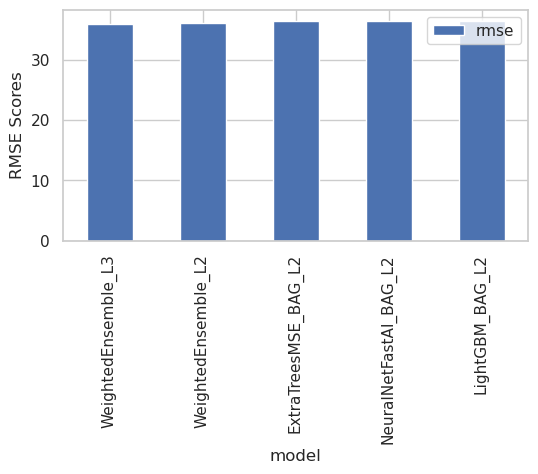

In [121]:
exp2_table.plot(kind="bar", x="model", y= "rmse", figsize=(6, 3))
plt.ylabel("RMSE Scores")
plt.show()

In [50]:
# Generate predictions for the test dataset
predictions = predictor_new_features.predict(test)

# Display the first few predictions
print(predictions.head())

0    14.608821
1     5.338243
2     4.434274
3     4.752519
4     4.227653
Name: count, dtype: float32


In [53]:
negative_values_count = (predictions < 0).sum()
negative_values_count

0

In [54]:
# Remember to set all negative values to zero?


# Set them to zero
predictions[predictions < 0] = 0

In [56]:
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [57]:
# Same submitting predictions

#submission["count"] = predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features_RamkumarM"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 385kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                     status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-03-15 06:54:47  new features_RamkumarM          complete  0.46778      0.46778       
submission.csv               2024-03-15 06:05:03  first raw submission RamkumarM  complete  1.7781       1.7781        


#### New Score of `?`

In [62]:
new_score = 0.46778 
print(new_score)

0.46778


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [63]:
#predictor_new_hpo = TabularPredictor(?).fit(?)


# Define hyperparameters for specific models
hyperparameters = {
    'GBM': [{'num_boost_round': 100}, {'num_boost_round': 200}],
    'CAT': [{'iterations': 100, 'learning_rate': 0.1}, {'iterations': 200, 'learning_rate': 0.05}],
    'RF': [{'n_estimators': 100}, {'n_estimators': 200}]
}

# Define hyperparameter tuning options
hyperparameter_tune_kwargs = {
    'num_trials': 5,
    'scheduler': 'local',
    'searcher': 'random'
}

# Initialize and train the predictor with hyperparameter optimization
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=df_train,
    presets='best_quality',
    time_limit=600,  # 10 minutes
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)



No path specified. Models will be saved in: "AutogluonModels/ag-20240315_071730"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240315_071730"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Feb 13 09:50:28 UTC 2024
Disk Space Avail:   0.76 GB / 5.36 GB (14.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 12
Label Column: c

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1/T1 ...
	-45.1048	 = Validation score   (-root_mean_squared_error)
	3.53s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-39.5293	 = Validation score   (-root_mean_squared_error)
	3.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-43.7004	 = Validation score   (-root_mean_squared_error)
	3.63s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-116.8728	 = Validation score   (-root_mean_squared_error)
	3.8

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: LightGBM_2_BAG_L1/T1 ...
	-41.1531	 = Validation score   (-root_mean_squared_error)
	4.11s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L1/T2 ...
	-38.3504	 = Validation score   (-root_mean_squared_error)
	5.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L1/T3 ...
	-40.842	 = Validation score   (-root_mean_squared_error)
	4.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L1/T4 ...
	-81.6842	 = Validation score   (-root_mean_squared_error

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: CatBoost_BAG_L1/T1 ...
	-49.0502	 = Validation score   (-root_mean_squared_error)
	2.62s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T2 ...
	-53.5106	 = Validation score   (-root_mean_squared_error)
	2.29s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T3 ...
	-53.4753	 = Validation score   (-root_mean_squared_error)
	2.4s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T4 ...
	-44.307	 = Validation score   (-root_mean_squared_error)
	4.01s	

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 98.
	Ran out of time, early stopping on iteration 100.
	Ran out of time, early stopping on iteration 104.
	Ran out of time, early stopping on iteration 108.
	Ran out of time, early stopping on iteration 116.
	Ran out of time, early stopping on iteration 119.
	Ran out of time, early stopping on iteration 138.
	Ran out of time, early stopping on iteration 166.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_2_BAG_L1/T1 ...
	-49.314	 = Validation score   (-root_mean_squared_error)
	10.71s	 = Traini

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.8407	 = Validation score   (-root_mean_squared_error)
	5.4s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-38.047	 = Validation score   (-root_mean_squared_error)
	7.4s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-37.7666	 = Validation score   (-root_mean_squared_error)
	6.92s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.706	 = Validation score   (-root_mean_squared_error)
	7.97s	 

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L2/T1 ...
	-37.8121	 = Validation score   (-root_mean_squared_error)
	8.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L2/T2 ...
	-38.0453	 = Validation score   (-root_mean_squared_error)
	12.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L2/T3 ...
	-37.7481	 = Validation score   (-root_mean_squared_error)
	10.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_2_BAG_L2/T4 ...
	-63.8096	 = Validation score   (-root_mean_squared_error)
	13.07s	 = Training   runtime
	0.0s	 = Valid

In [64]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -37.401554       0.423062   20.668522                0.000512           0.423853            2       True         23
1     WeightedEnsemble_L3  -37.488728       1.912631  294.096911                0.000766           0.239995            3       True         34
2    LightGBM_2_BAG_L1/T2  -37.545749       0.189644   10.954672                0.189644          10.954672            1       True          7
3    LightGBM_2_BAG_L2/T3  -37.748139       1.911467  251.907080                0.000113          10.892382            2       True         31
4      LightGBM_BAG_L2/T3  -37.766645       1.911468  247.930667                0.000114           6.915969            2       True         26
5    LightGBM_2_BAG_L2/T1  -37.812126       1.911480  249.101130                

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForest_2_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T4': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T5': 'StackerEnsembleModel_CatBoost',
  'CatBoost_2_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'Ca

In [112]:
hpo_table = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True)).head()

In [116]:
hpo_table['rmse'] = abs(hpo_table['score_val'])

In [119]:
hpo_table.head()

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,rmse
0,WeightedEnsemble_L2,-37.401554,0.423062,20.668522,0.000512,0.423853,2,True,23,37.401554
1,WeightedEnsemble_L3,-37.488728,1.912631,294.096911,0.000766,0.239995,3,True,34,37.488728
2,LightGBM_2_BAG_L1/T2,-37.545749,0.189644,10.954672,0.189644,10.954672,1,True,7,37.545749
3,LightGBM_2_BAG_L2/T3,-37.748139,1.911467,251.907080,0.000113,10.892382,2,True,31,37.748139
4,LightGBM_BAG_L2/T3,-37.766645,1.911468,247.930667,0.000114,6.915969,2,True,26,37.766645


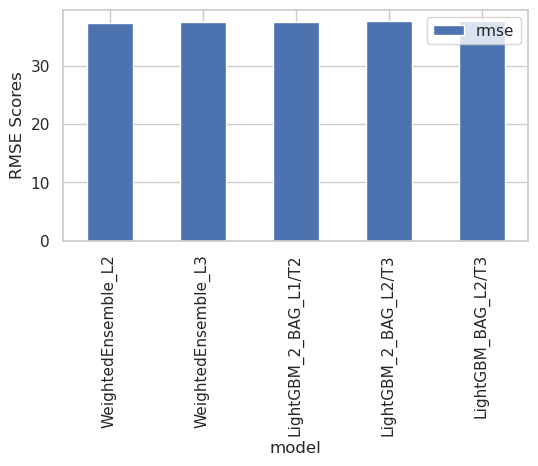

In [118]:

hpo_table.plot(kind="bar", x="model", y= "rmse", figsize=(6, 3))
plt.ylabel("RMSE Scores")
plt.show()

In [82]:

best_model = predictor_new_hpo.get_model_best()


leaderboard = predictor_new_hpo.leaderboard(silent=True)  # silent=True to avoid printing the table


top_model_score_hpo = leaderboard.loc[leaderboard['model'] == best_model, 'score_val'].values[0]

print(f"Score of the top model ({best_model}):", top_model_score_hpo)


Score of the top model (WeightedEnsemble_L2): -37.40155370408471


In [83]:
## **RMSE is postive value of score_val, this might be the negated version of one of those metrics to ensure a "higher is better" interpretation universally across AutoGluon's interface. **

RMSE_predictor_new_hpo = abs(top_model_score_hpo)
RMSE_predictor_new_hpo

37.40155370408471

In [66]:
# Remember to set all negative values to zero
predictions = predictor_new_hpo.predict(test)
# Display the first few predictions
print(predictions.head())

0    16.246550
1     2.700241
2     0.072582
3     1.112170
4     1.102487
Name: count, dtype: float32


In [67]:
negative_values_count = (predictions < 0).sum()
negative_values_count


52

In [68]:
predictions[predictions < 0] = 0

In [69]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [70]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 530kB/s]
Successfully submitted to Bike Sharing Demand

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-03-15 07:30:54  new features with hyperparameters  complete  0.50189      0.50189       
submission_new_features.csv  2024-03-15 06:54:47  new features_RamkumarM             complete  0.46778      0.46778       
submission.csv               2024-03-15 06:05:03  first raw submission RamkumarM     complete  1.7781       1.7781        


#### New Score of `?`

In [73]:
new_score_hpo = 0.50189

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

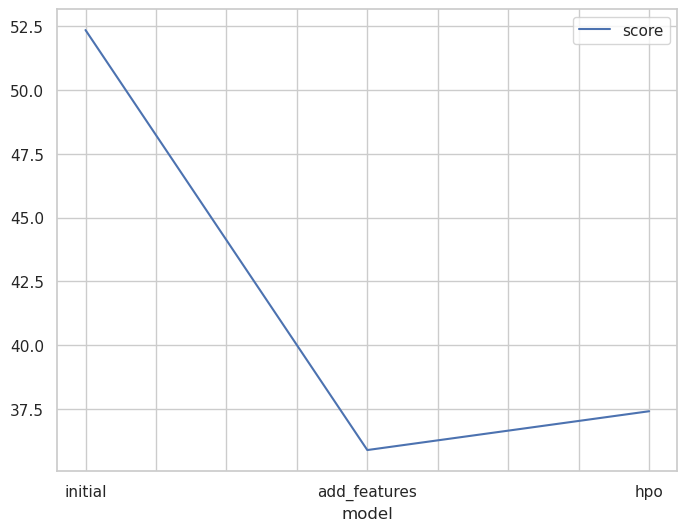

In [86]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [RMSE_predictor_initial, RMSE_predictor_new_features, RMSE_predictor_new_hpo]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

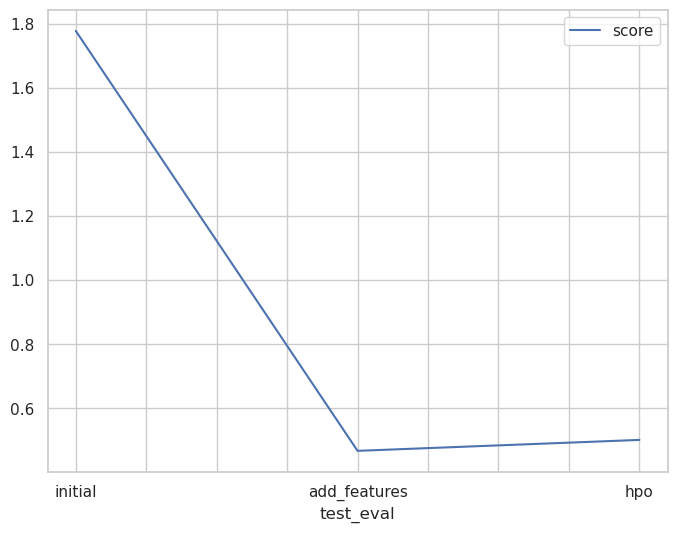

In [75]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [initial_score, new_score, new_score_hpo]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [106]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default values', 'default values', 'GBM: num_boost_round: 100 , num_boost_round: 200'],
    "hpo2": ['default values', 'default values', 'CAT: iterations: 100, learning_rate: 0.1,iterations: 200, learning_rate: 0.05'],
    "hpo3": ['default values', 'default values', 'RF: n_estimators: 100, n_estimators: 200'],
    "score": [initial_score, new_score, new_score_hpo]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default values,default values,default values,1.77810
1,add_features,default values,default values,default values,0.46778
2,hpo,"GBM: num_boost_round: 100 , num_boost_round: 200","CAT: iterations: 100, learning_rate: 0.1,iterations: 200, learning_rate: 0.05","RF: n_estimators: 100, n_estimators: 200",0.50189
